# Implementing and Understanding Linear Regression Using sklearn
# - Mohan Bakshi

#### Problem statement:

Creating a model to Pridict Expenses that is amount of insurance paid by person based on the attributes like age, sex, bmi, smoker, region.


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd

# For visualtizations
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Loading the dataset
data = pd.read_csv('../Data Analysis/Datasets/insurance.csv')

# Checking the data
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
# Information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

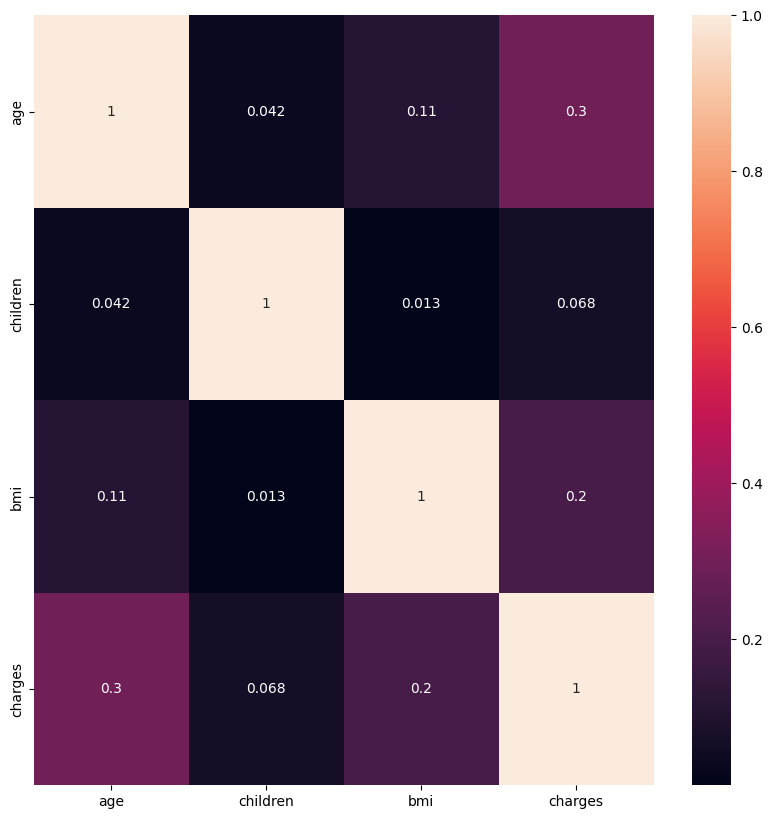

In [17]:
# Checking the feature correlations Matrix

fig, ax = plt.subplots(figsize = (10,10))

corr = data[['age','children', 'bmi','charges']].corr()

sns.heatmap(corr, annot= True, ax= ax)

This chart illustrate a correlation heatmap showing the relationships between four variables: age, children, BMI (Body Mass Index), and charges.

1. Age and Charges:

There is a moderate positive correlation (0.3) between age and charges, indicating that as age increases, the charges tend to increase as well.

2. BMI and Charges:

There is a moderate positive correlation (0.2) between BMI and charges, suggesting that higher BMI is associated with higher charges.

3. Children and Charges:

There is a weak positive correlation (0.068) between the number of children and charges, indicating that the number of children has a very small impact on charges.

4. Age and BMI:

There is a weak positive correlation (0.11) between age and BMI, indicating that older individuals tend to have a slightly higher BMI.

5. Age and Children:

There is a very weak positive correlation (0.042) between age and the number of children, suggesting a minimal relationship between these variables.

6. Children and BMI:

There is a very weak positive correlation (0.013) between the number of children and BMI, indicating that the number of children has a negligible impact on BMI.

7. Children and Age:

The correlation between children and age is weak (0.042), suggesting that the number of children is not strongly related to age.

Overall:

The strongest correlation observed is between age and charges (0.3), while the weakest correlation is between children and BMI (0.013). Most of the correlations are weak, indicating that there are no very strong linear relationships between these variables.

In [33]:
data_types = dict(data.dtypes)

print("Categorical Columns in datasets are:")
for name, type in data_types.items():
    if type == 'object':
        print(f'<========{name}=========>')
        print(data[name].value_counts(), '\n')
    
    


Categorical Columns in datasets are:
<========sex=========>
sex
male      676
female    662
Name: count, dtype: int64 

<========smoker=========>
smoker
no     1064
yes     274
Name: count, dtype: int64 

<========region=========>
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64 



In [34]:
# Label Encoding the categorical columns

from sklearn.preprocessing import LabelEncoder

for name, type in data_types.items():
    if type == 'object':
        le = LabelEncoder()
        data[name] = le.fit_transform(data[name])

# Checking the data after label encoding
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [37]:
# Now, when all the columns are numerical, lets create features and target variable to pridict the expenses

X =  data.iloc[:, :-1].values # selects all columns except the last one
Y = data.iloc[:,-1].values # selects only the last column

In [38]:
X.shape, Y.shape

((1338, 6), (1338,))

In [65]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split( X, Y, test_size=0.1, random_state=0)

In [66]:
# Applying Model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(Xtrain, Ytrain)


LinearRegression()

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Making predictions on the test set
y_pred = model.predict(Xtest)

# Calculating and printing evaluation metrics
mae = mean_absolute_error(Ytest, y_pred)
mse = mean_squared_error(Ytest, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Ytest, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4255.476068832503
Mean Squared Error: 34603420.08617239
Root Mean Squared Error: 5882.467176803657
R-squared: 0.8215430369031268


The model has an R-squared of 0.82, which suggests a good fit as it explains 82% of the variance in the target variable. However, the MAE and RMSE values suggest that there is still a considerable average error in the predictions.